Import all dependencies.

In [1]:
%%capture
import sys,glob,warnings,os,requests
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from PIL import Image

Import main python module (watershed_infer).

In [2]:
%%capture
sys.path.insert(1, '../src');
from mrcnn_infer import *;

Download pretrained MRCNN model.

In [3]:
%%capture
_URL = 'https://ndownloader.figshare.com/files/22236213?private_link=dd27a1ea28ce434aa7d4'
open('mask_rcnn_cells_0194.h5', 'wb').write((requests.get(_URL, allow_redirects=True)).content)

Setup Config File Path.

In [4]:
config_file_path='./demo.ini'

Download sample images.

In [5]:
import zipfile
_URL = "https://ndownloader.figshare.com/articles/12107529?private_link=1b82745b8a3dc89a3a86"
open('images.zip', 'wb').write((requests.get(_URL, allow_redirects=True)).content)
with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall('./images')

Read Images.

In [6]:
img_path = "./images/*.tif"
image_list = glob.glob(img_path)
img = np.zeros((len(image_list),1078,1278))

for i in range(len(image_list)):
    img[i,:,:] = np.array(Image.open(image_list[i]))

Plot Input images.

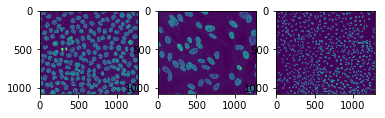

In [7]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(img[0])
axarr[1].imshow(img[1])
axarr[2].imshow(img[2])
plt.rcParams['figure.figsize'] = [15, 15]

Model and configuration file path.

In [8]:
mrcnn_model_path = "./mask_rcnn_cells_0194.h5"
config_file_path = "./demo.ini"

Prediction (Instance Segmentation).

In [9]:
%%capture
mask = mrcnn_infer(img, mrcnn_model_path, config_file_path)

Plot Output images.

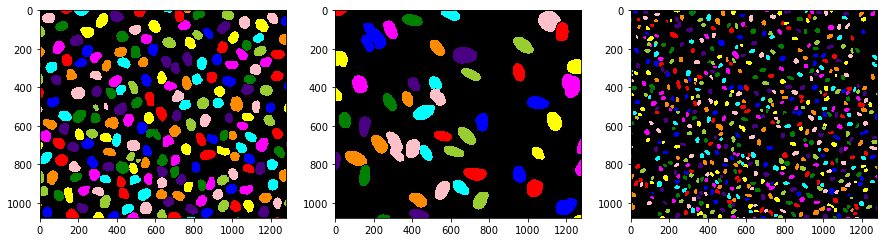

In [10]:
pf, axarr = plt.subplots(1,3)
axarr[0].imshow(label2rgb(mask[0],bg_color=(0, 0, 0),bg_label=0))
axarr[1].imshow(label2rgb(mask[1],bg_color=(0, 0, 0),bg_label=0))
axarr[2].imshow(label2rgb(mask[2],bg_color=(0, 0, 0),bg_label=0))
plt.rcParams['figure.figsize'] = [15, 15]